In [1]:
# Importing the required libraries and modules
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.autograd as autograd
from torch.autograd import Variable
from collections import deque, namedtuple
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing custom modules
from Lunar_Lander_Reinforce import Agent  # The Agent class is defined in Reinforce module
from Lunar_Lander_AI import Network  # The Network class is defined in AI module

In [3]:
# Setting up the Lunar Environment
import gymnasium as gym  # Gymnasium is the correct import for Gym environments
env = gym.make('LunarLander-v2')
state_shape = env.observation_space.shape
state_size = env.observation_space.shape[0]
number_actions = env.action_space.n
print('State shape: ', state_shape)
print('State size: ', state_size)
print('Number of actions: ', number_actions)

State shape:  (8,)
State size:  8
Number of actions:  4


In [4]:
### Initialize the Agent

# Create an instance of the Agent class
agent = Agent(state_size, number_actions)

### Training the agent

# Hyperparameters
number_episodes = 2000
maximum_number_timesteps_per_episode = 1000
epsilon_starting_value  = 1.0
epsilon_ending_value  = 0.01
epsilon_decay_value  = 0.995
epsilon = epsilon_starting_value

# Deque to store scores of the last 100 episodes
scores_on_100_episodes = deque(maxlen=100)


c:\Users\pdhru\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Loop through episodes
for episode in range(1, number_episodes + 1):
    state, _ = env.reset()
    score = 0

    # Loop through timesteps in the current episode
    for t in range(maximum_number_timesteps_per_episode):
        action = agent.act(state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break

    # Append the score to the deque
    scores_on_100_episodes.append(score)

    # Update epsilon
    epsilon = max(epsilon_ending_value, epsilon_decay_value * epsilon)

    # Print the average score over the last 100 episodes
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_on_100_episodes)), end="")
    
    # Print the average score every 100 episodes
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_on_100_episodes)))

    # Check if the environment is solved (average score >= 200)
    if np.mean(scores_on_100_episodes) >= 200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode - 100, np.mean(scores_on_100_episodes)))
        torch.save(agent.local_qnetwork.state_dict(), 'checkpoint.pth')
        break

# Function to display a video of the trained agent
from IPython.display import HTML, display
from gym.wrappers.monitoring.video_recorder import VideoRecorder

def show_video_of_model(agent, env_name):
    env = gym.make(env_name, render_mode='human')
    state, _ = env.reset()
    done = False
    frames = []

    # Loop through timesteps to capture frames
    while not done:
        frame = env.render()
        frames.append(frame)
        action = agent.act(state)
        state, reward, done, _, _ = env.step(action.item())

    # Close the environment
    env.close()

# Display a video of the trained agent playing the LunarLander-v2 environment
show_video_of_model(agent, 'LunarLander-v2')

Episode 100	Average Score: -147.73
Episode 200	Average Score: -92.827
Episode 300	Average Score: -15.00
Episode 400	Average Score: 42.372
Episode 500	Average Score: 140.61
Episode 600	Average Score: 147.87
Episode 700	Average Score: 190.32
Episode 713	Average Score: 200.89
Environment solved in 613 episodes!	Average Score: 200.89


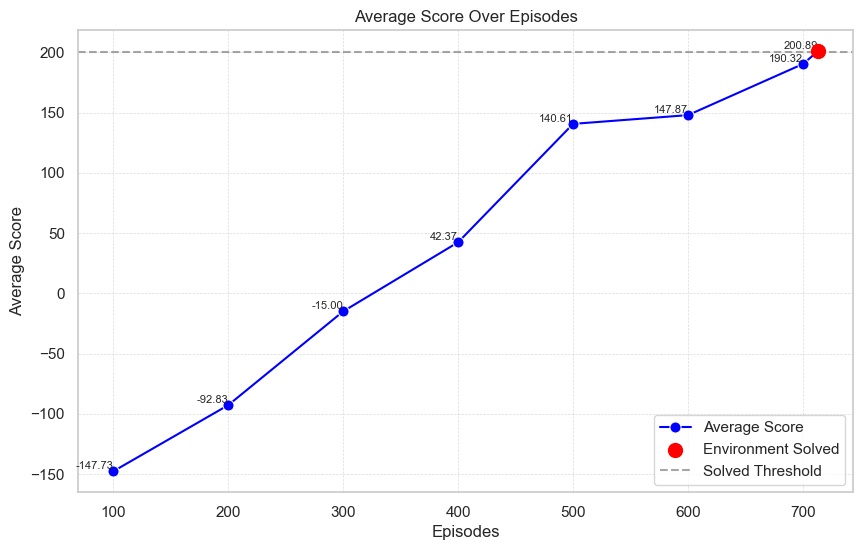

In [7]:
# Plotting the graph of average score over episodes

# Episode and average score data
episodes = [100, 200, 300, 400, 500, 600, 700, 713]
average_scores = [-147.73, -92.827, -15.00, 42.372, 140.61, 147.87, 190.32, 200.89]

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data with a line and markers
sns.lineplot(x=episodes, y=average_scores, marker='o', markersize=8, color='blue', label='Average Score')

# Highlight the point where the environment is solved
ax.scatter(713, 200.89, color='red', label='Environment Solved', s=100, zorder=5)

# Adding labels and title
ax.set(xlabel='Episodes', ylabel='Average Score', title='Average Score Over Episodes')
ax.axhline(y=200, color='gray', linestyle='--', label='Solved Threshold', alpha=0.7)

# Adding annotations for key points
for episode, score in zip(episodes, average_scores):
    ax.text(episode, score, f'{score:.2f}', ha='right', va='bottom', fontsize=8)

# Display the legend
ax.legend()

# Adding a grid for better readability
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


C:\Users\sanke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sanke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sanke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

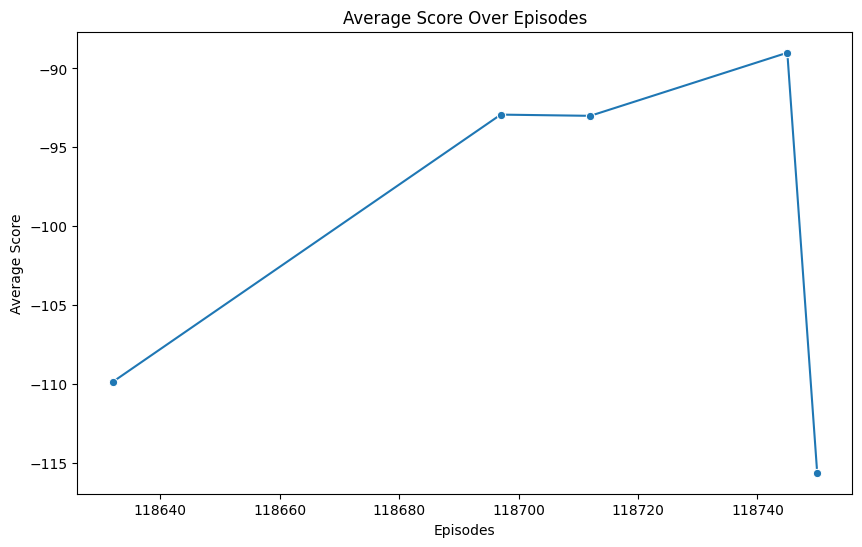

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
episodes = [118632, 118712, 118745, 118697, 118750]
average_scores = [-109.87, -93, -89, -92.923, -115.622]

# Create a DataFrame from the data
data = {'Episodes': episodes, 'Average Score': average_scores}
df = pd.DataFrame(data)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Episodes', y='Average Score', data=df, marker='o')
plt.title('Average Score Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.show()